 Step 0: Imports

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

Step 1: Dataset

In [3]:
# read the data set
df=pd.read_csv('wusool_data.csv')

In [4]:
# show the 1st two rows in data set
df.head(2)

,رقم تسلسلي,الحالة,المدينة,المنطقة,مدينة العنوان الوطني,تاريخ أول رحلة,تاريخ آخر رحلة,تاريخ التسجيل
0,1,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,ثول,مكة المكرمة,NaN,4/15/2021,4/16/2021,4/12/2021
1,2,فعالة (قامت بأخذ رحلة واحدة على الأقل في البرن...,طريف,الرياض,NaN,3/2/2021,4/20/2021,3/1/2021


In [5]:
# show the informations in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123871 entries, 0 to 123870
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   رقم تسلسلي            123871 non-null  int64 
 1   الحالة                123871 non-null  object
 2   المدينة               119594 non-null  object
 3   المنطقة               121306 non-null  object
 4   مدينة العنوان الوطني  96088 non-null   object
 5   تاريخ أول رحلة        100594 non-null  object
 6   تاريخ آخر رحلة        100594 non-null  object
 7   تاريخ التسجيل         123871 non-null  object
dtypes: int64(1), object(7)
memory usage: 7.6+ MB


Step 2: Data cleaning & prepressing 
1- column:
- rename columns to english.
- remove white space.
- check data type.
2- row:
- check missing date.
- fill missing date with 0.
- check duplicate.

In [6]:
df.columns

Index(['رقم تسلسلي', 'الحالة', 'المدينة', 'المنطقة', 'مدينة العنوان الوطني',
       'تاريخ أول رحلة', 'تاريخ آخر رحلة', 'تاريخ التسجيل'],
      dtype='object')

In [7]:
df.shape

(123871, 8)

In [9]:
# rename the columns
df= df.rename(columns={
    'رقم تسلسلي':'serial-number',
    'الحالة':'status',
    'المدينة':'city',
    'المنطقة':'region',
    'مدينة العنوان الوطني':'NAS',
    'تاريخ أول رحلة':'FirstFlightDate',
    'تاريخ آخر رحلة':'LastFlightDate',
    'تاريخ التسجيل':'RegistrationDate'})



In [13]:
df.columns

Index(['serial-number', 'status', 'city', 'region', 'NAS', 'FirstFlightDate',
       'LastFlightDate', 'RegistrationDate'],
      dtype='object')

In [10]:
#remove white space.
df.columns = df.columns.str.strip()

In [11]:
#check data type
print(df.dtypes)

serial-number        int64
status              object
city                object
region              object
NAS                 object
FirstFlightDate     object
LastFlightDate      object
RegistrationDate    object
dtype: object


In [12]:
#check missimg date.
df.isna().sum()

serial-number           0
status                  0
city                 4277
region               2565
NAS                 27783
FirstFlightDate     23277
LastFlightDate      23277
RegistrationDate        0
dtype: int64

In [21]:
#fill missing date with 0.
df = df.fillna(0)
df.isna().sum()

serial-number       0
status              0
city                0
region              0
NAS                 0
FirstFlightDate     0
LastFlightDate      0
RegistrationDate    0
dtype: int64

In [26]:
#check duplicate.
df.duplicated().sum()

0

In [35]:
print("The Dimension of orignal DF is: ",df.shape)

The Dimension of orignal DF is:  (123871, 8)


Step 3: EDA

(array([0, 1, 2]),
 [Text(0, 0, 'فعالة (قامت بأخذ رحلة واحدة على الأقل في البرنامج)'),
  Text(1, 0, 'مستبعدة'),
  Text(2, 0, 'مؤهلة')])

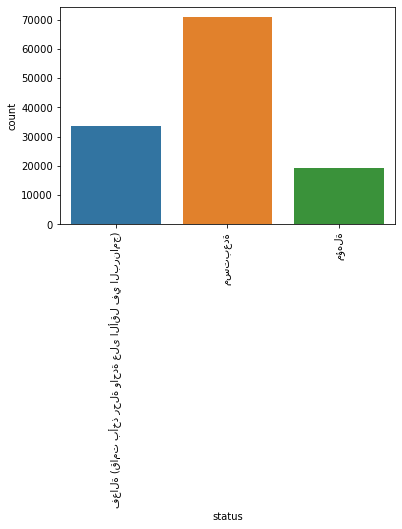

In [43]:
#1-D chart to check stutes columns 
sns.countplot(x=df.status, data=df) ;
plt.xticks(rotation=90)


Step 4: Modelling

Step 5:  Evaluation & Conclusion